# 1. Import Library

In [35]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 資料準備

In [36]:
all_df = pd.read_excel("data/titanic3.xls")

In [37]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [38]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [39]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [40]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [41]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [42]:
train_Features[:2]

array([[0.        , 0.        , 0.38844819, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00679502, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [43]:
test_Features[:2]

array([[0.        , 0.        , 0.22338172, 0.125     , 0.        ,
        0.44409922, 1.        , 0.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.0585561 , 0.        , 0.        , 1.        ]])

# 3. Create Model 

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [45]:
model = Sequential()

In [46]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [47]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [48]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [49]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [50]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [51]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [52]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6921 - acc: 0.5785 - val_loss: 0.6845 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6839 - acc: 0.5871 - val_loss: 0.6340 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6294 - acc: 0.5871 - val_loss: 0.4698 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.5712 - acc: 0.7204 - val_loss: 0.4486 - val_acc: 0.7692
Epoch 5/30
 - 0s - loss: 0.5417 - acc: 0.7817 - val_loss: 0.4611 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.5214 - acc: 0.7731 - val_loss: 0.4536 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.4827 - acc: 0.7806 - val_loss: 0.4266 - val_acc: 0.8077
Epoch 8/30
 - 0s - loss: 0.4762 - acc: 0.7656 - val_loss: 0.4279 - val_acc: 0.8077
Epoch 9/30
 - 0s - loss: 0.4828 - acc: 0.7720 - val_loss: 0.4295 - val_acc: 0.8173
Epoch 10/30
 - 0s - loss: 0.4666 - acc: 0.7785 - val_loss: 0.4255 - val_acc: 0.7885
Epoch 11/30
 - 0s - loss: 0.4604 - acc: 0.7903 - val_loss: 0.4348 - val_acc: 0.8269
Epoch 12/30
 - 0s - loss: 0.4608 - acc:

# 6. Print History

In [53]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

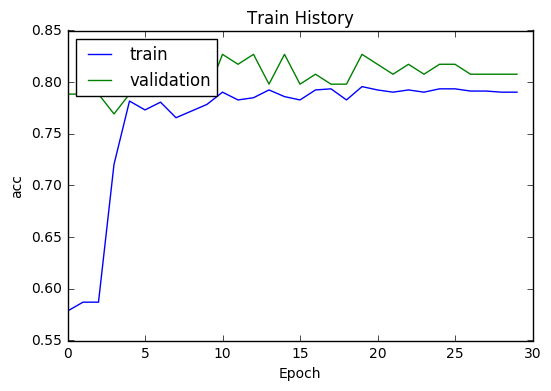

In [54]:
show_train_history(train_history,'acc','val_acc')

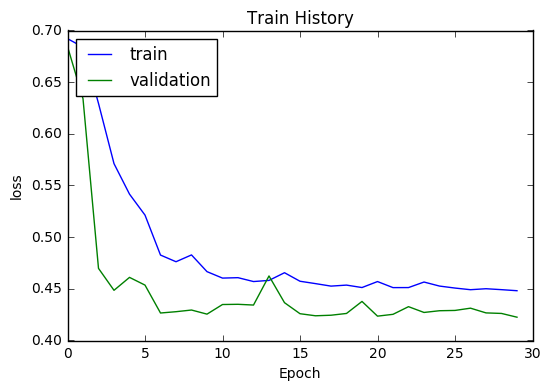

In [55]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [56]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 176us/step


In [57]:
scores[1]

0.8072727277062156

# 預測資料

# 加入Jack & Rose資料

In [58]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [59]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [60]:
all_df=pd.concat([all_df,JR_df])

In [61]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [62]:
all_Features,Label=PreprocessData(all_df)

In [63]:
all_probability=model.predict(all_Features)

In [64]:
all_probability[:10]

array([[0.97949535],
       [0.54855865],
       [0.97788656],
       [0.3639751 ],
       [0.97647536],
       [0.23027137],
       [0.94537723],
       [0.26419994],
       [0.9451323 ],
       [0.26677343]], dtype=float32)

In [65]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 預測Jack & Rose資料的生存機率

In [66]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.121748
1,1,Rose,1,female,20.0,1,0,100.0,S,0.973423


# 查看生存機率高，卻沒有存活

In [67]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.977887
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.976475
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.972036
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.969257
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.966126
445,0,"Hiltunen, Miss. Marta",2,female,18.0,1,1,13.0000,S,0.900904
468,0,"Karnes, Mrs. J Frank (Claire Bennett)",2,female,22.0,0,0,21.0000,S,0.903684


In [68]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.979495
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.548559
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.977887
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.363975
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.976475
